In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('height_weight.csv')

In [3]:
df


,HEIGHT,WEIGHT
0,5.6,56
1,6.0,53
2,7.0,50
3,5.3,60
4,5.4,59
5,3.4,80
6,5.5,61
7,3.4,81
8,8.5,47
9,7.5,48


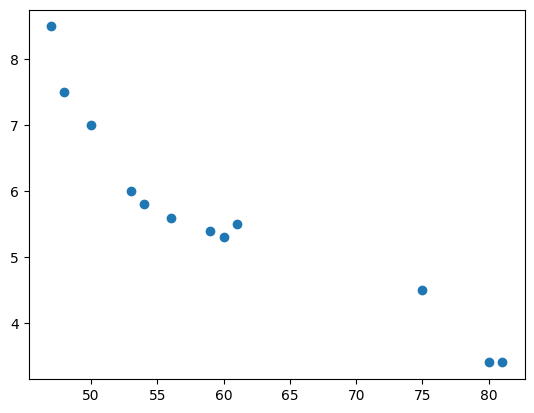

In [4]:
plt.scatter(df.WEIGHT, df.HEIGHT)

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


In [6]:
km = KMeans(n_clusters= 3)
km

KMeans(n_clusters=3)

In [7]:
y_predicted = km.fit_predict(df[['WEIGHT','HEIGHT']])
y_predicted

/home/cipher/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 0, 0, 2, 2, 1, 2, 1, 0, 0, 1, 0], dtype=int32)

In [8]:
#Identifyind clusters
df['clusters'] = y_predicted
df

,HEIGHT,WEIGHT,clusters
0,5.6,56,2
1,6.0,53,0
2,7.0,50,0
3,5.3,60,2
4,5.4,59,2
5,3.4,80,1
6,5.5,61,2
7,3.4,81,1
8,8.5,47,0
9,7.5,48,0


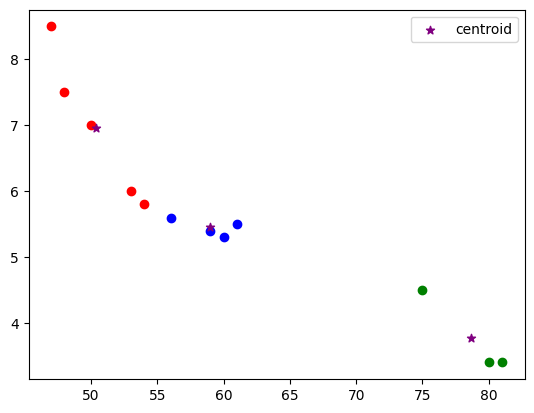

In [9]:
df0 = df[df.clusters == 0]
df1 = df[df.clusters == 1]
df2 = df[df.clusters == 2]
plt.scatter(df0.WEIGHT ,df0.HEIGHT, color = 'red')
plt.scatter(df1.WEIGHT ,df1.HEIGHT, color = 'green')
plt.scatter(df2.WEIGHT ,df2.HEIGHT, color = 'blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color ='purple', marker = '*',label = 'centroid')
plt.xlabel = 'WEIGHT'
plt.ylabel = 'HEIGHT'
plt.legend()

In [10]:
#From above, some blue cluster members  are marked green and this can be solved usiing MiniMax scaler
scaler = MinMaxScaler()
scaler.fit(df[['HEIGHT']])
df['HEIGHT'] = scaler.transform(df[['HEIGHT']])
scaler.fit(df[['WEIGHT']])
df['WEIGHT'] = scaler.transform(df[['WEIGHT']])
df

,HEIGHT,WEIGHT,clusters
0,0.431373,0.264706,2
1,0.509804,0.176471,0
2,0.705882,0.088235,0
3,0.372549,0.382353,2
4,0.392157,0.352941,2
5,0.000000,0.970588,1
6,0.411765,0.411765,2
7,0.000000,1.000000,1
8,1.000000,0.000000,0
9,0.803922,0.029412,0


In [11]:
y_predicted = km.fit_predict(df[['WEIGHT','HEIGHT']])
y_predicted
df['clusters'] = y_predicted
df


/home/cipher/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,HEIGHT,WEIGHT,clusters
0,0.431373,0.264706,2
1,0.509804,0.176471,2
2,0.705882,0.088235,0
3,0.372549,0.382353,2
4,0.392157,0.352941,2
5,0.000000,0.970588,1
6,0.411765,0.411765,2
7,0.000000,1.000000,1
8,1.000000,0.000000,0
9,0.803922,0.029412,0


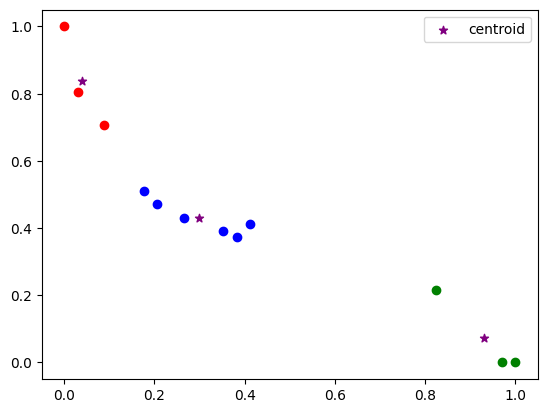

In [12]:
df0 = df[df.clusters == 0]
df1 = df[df.clusters == 1]
df2 = df[df.clusters == 2]
plt.scatter(df0.WEIGHT ,df0.HEIGHT, color = 'red')
plt.scatter(df1.WEIGHT ,df1.HEIGHT, color = 'green')
plt.scatter(df2.WEIGHT ,df2.HEIGHT, color = 'blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color ='purple', marker = '*',label = 'centroid')
plt.xlabel = 'WEIGHT'
plt.ylabel = 'HEIGHT'
plt.legend()

In [16]:
K_n = range(1,10)
sse =[]
for k in K_n:
    km = KMeans(n_clusters = k)
    km.fit_predict(df[['WEIGHT','HEIGHT']])
    sse.append(km.inertia_)
sse
    

/home/cipher/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/cipher/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/cipher/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/cipher/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

[2.3350313981801882,
 0.6217053270109789,
 0.15828847879020896,
 0.10739459182365761,
 0.05893566576957586,
 0.016580161476355243,
 0.010044213763936955,
 0.004133025759323338,
 0.0022587466359092626]

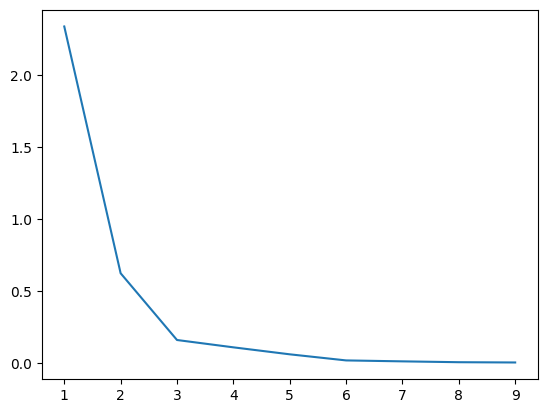

In [17]:
plt.xlabel = 'K values'
plt.ylabel = 'sum of squared  error'
plt.plot(K_n,sse)

In [18]:
#An elbow occured at 3 hence ideal values for K_clusters